In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

In [320]:
data=pd.read_csv("Rainfall.csv")

# Data Preprocessing

In [321]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [322]:
data.columns=[a.strip() for a in data.columns]

In [323]:
data.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [324]:
data.dropna(inplace=True)

In [325]:
data.rainfall.value_counts()

rainfall
yes    248
no     117
Name: count, dtype: int64

In [326]:
data.rainfall=data.rainfall.replace({'yes':1,'no':0})

C:\Users\vaibh\AppData\Local\Temp\ipykernel_28912\1609939009.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.rainfall=data.rainfall.replace({'yes':1,'no':0})


In [327]:
data.drop('day',axis=1,inplace=True)

In [328]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [329]:
data.groupby('rainfall').median()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,
0,1013.10,29.10,25.50,23.7,20.9,75.0,49.0,8.8,70.0,16.7
1,1012.75,27.55,25.35,23.7,22.3,84.0,84.0,1.5,70.0,21.9


In [330]:
x=data.drop('rainfall',axis=1).values
y=data.rainfall.values

In [331]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rfc.fit(x, y)

# Get feature importances and select top 3
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

top_3_indices = indices[:3]
print(f"Top 3 Feature Indices: {top_3_indices}")
print(f"Top 3 Feature Names: {data.columns[top_3_indices]}")

# Use only the top 3 features
x_top3 = x[:, top_3_indices]


Top 3 Feature Indices: [6 7 5]
Top 3 Feature Names: Index(['cloud', 'rainfall', 'humidity'], dtype='object')


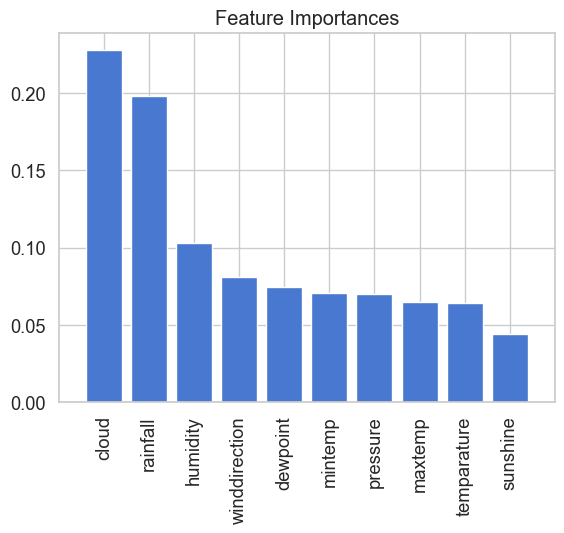

In [332]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), data.columns[:-1][indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

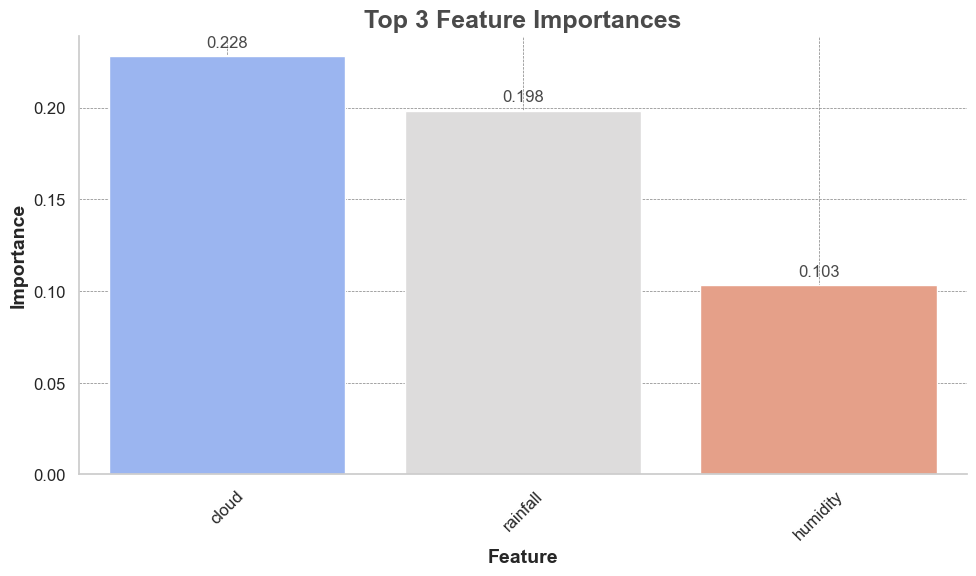

In [333]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.columns[top_3_indices], y=importances[top_3_indices], palette="coolwarm",hue=data.columns[top_3_indices])
plt.title("Top 3 Feature Importances", fontsize=18, weight='bold', color='#4A4A4A')
plt.xlabel("Feature", fontsize=14, weight='bold')
plt.ylabel("Importance", fontsize=14, weight='bold')
for i, value in enumerate(importances[top_3_indices]):
    plt.text(i, value + 0.005, f"{value:.3f}", ha='center', fontsize=12, color='#4A4A4A')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

### Data Visualisation

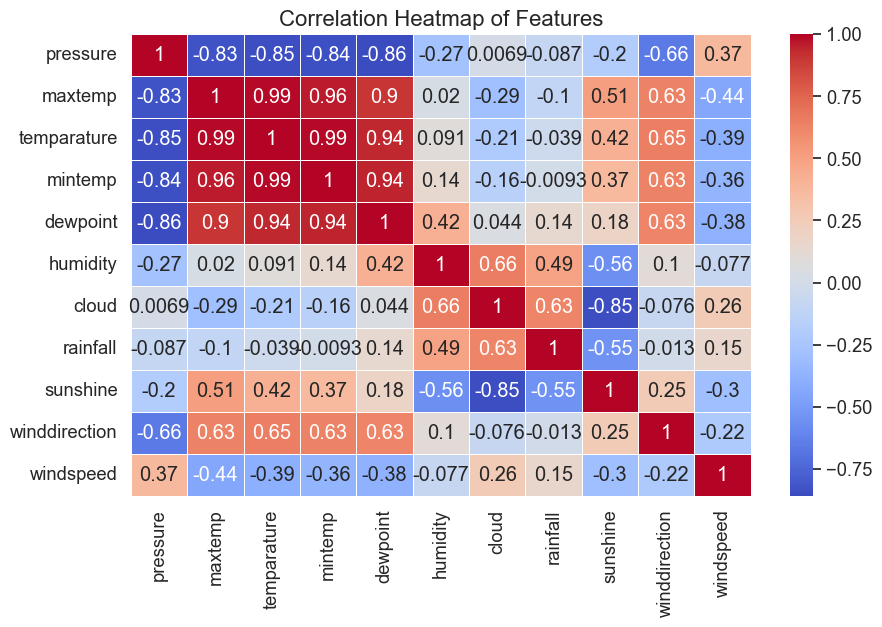

In [334]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

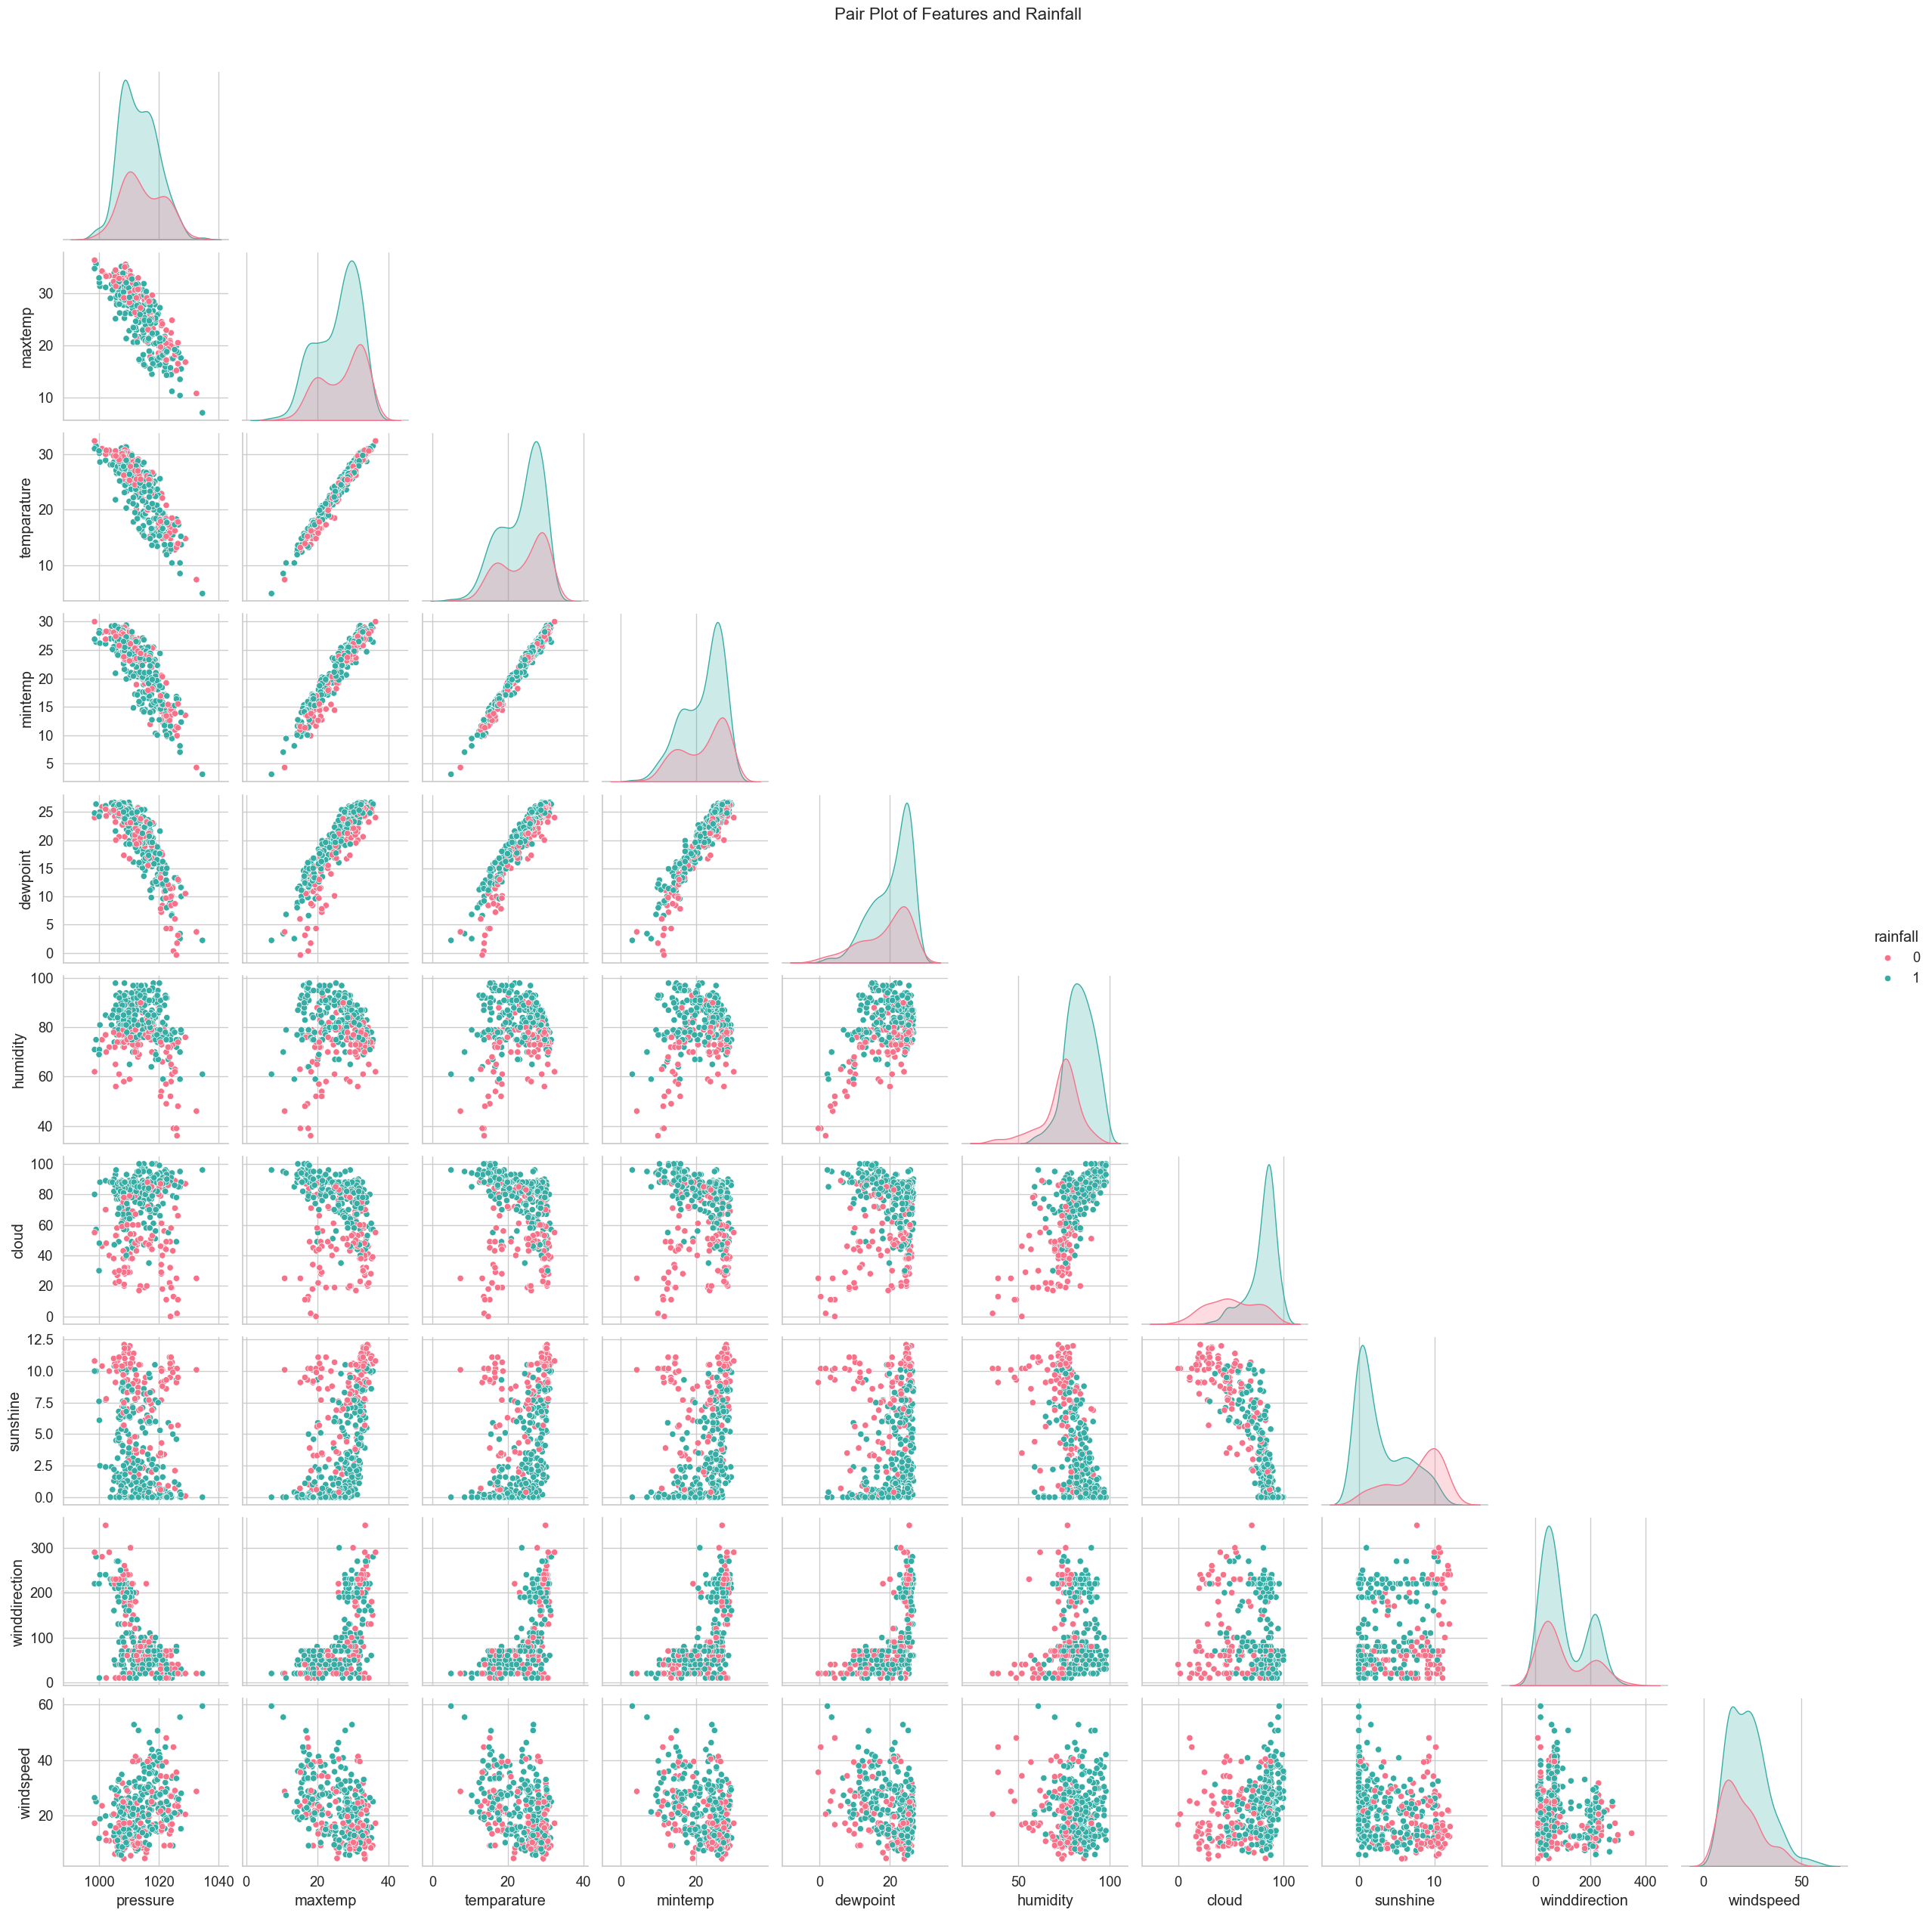

In [335]:
# Pair plot to visualize feature interactions with rainfall
sns.pairplot(data, hue='rainfall', palette="husl", corner=True, diag_kind="kde")
plt.suptitle("Pair Plot of Features and Rainfall", y=1.02, fontsize=16)
plt.show()

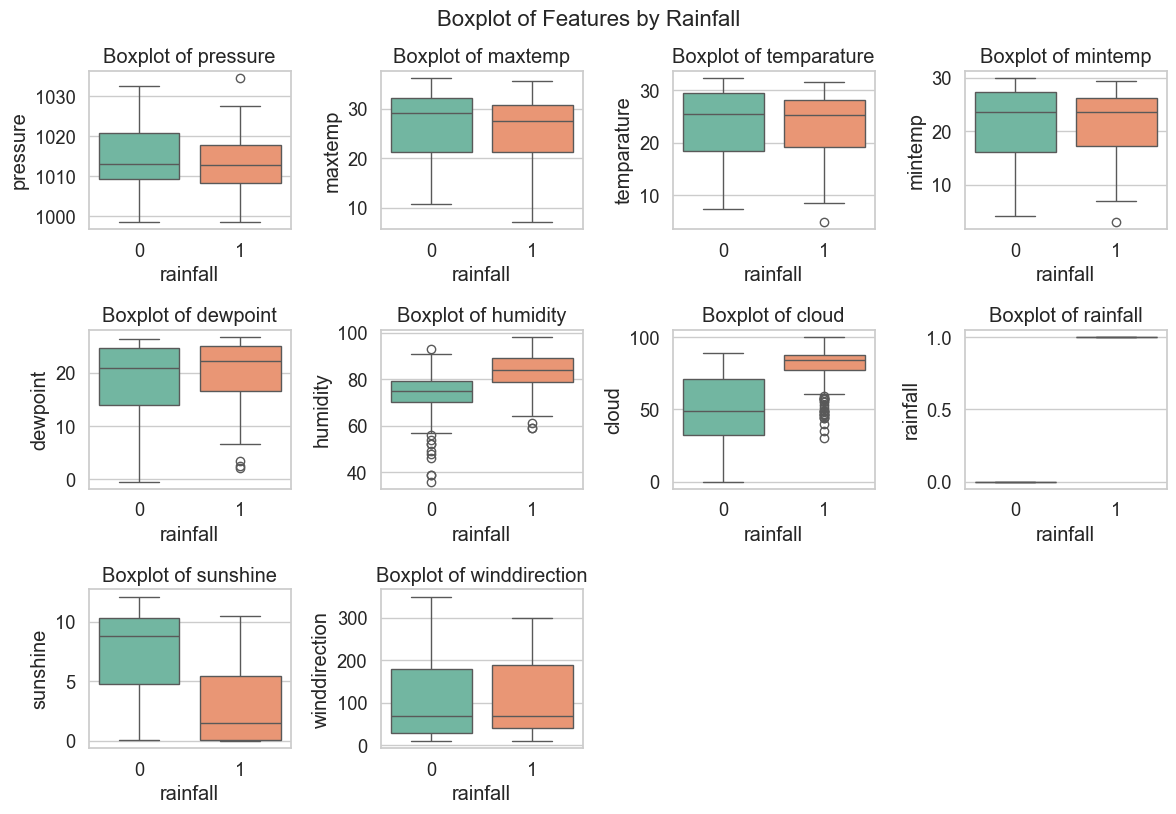

In [336]:
# Boxplots for each feature against rainfall
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='rainfall', y=column, hue='rainfall', data=data, palette="Set2", legend=False)
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
plt.suptitle("Boxplot of Features by Rainfall", y=1.02, fontsize=16)
plt.show()

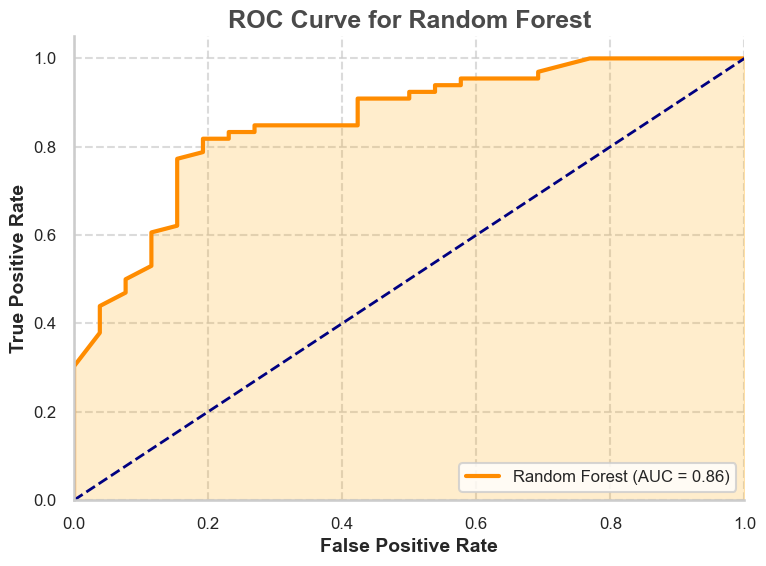

In [337]:
from sklearn.metrics import roc_curve, roc_auc_score

rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rfc.fit(x_train, y_train)

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(8, 6))
y_pred_prob = rfc.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', color='darkorange', lw=3)
plt.fill_between(fpr, tpr, color='orange', alpha=0.2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, weight='bold')
plt.ylabel('True Positive Rate', fontsize=14, weight='bold')
plt.title('ROC Curve for Random Forest', fontsize=18, weight='bold', color='#4A4A4A')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right", fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()


# Splitting Dataset in Training and Test Set

In [338]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_top3,y,test_size=0.25,random_state=500)

# K Nearest Neighbors

In [339]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
knn = grid_search.best_estimator_

Best Parameters: {'n_neighbors': 7}


In [340]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [341]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,knn.predict(x_test))

0.8260869565217391

In [342]:
confusion_matrix(y_test,knn.predict(x_test))

array([[19,  7],
       [ 9, 57]], dtype=int64)

# Logistic Regression Model

In [343]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000,random_state=10)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [344]:
accuracy_score(y_test,lr.predict(x_test))

0.8152173913043478

In [345]:
confusion_matrix(y_test,lr.predict(x_test))

array([[17,  9],
       [ 8, 58]], dtype=int64)

# SVM Model

In [346]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [347]:
accuracy_score(y_test,svc.predict(x_test))

0.8152173913043478

In [348]:
confusion_matrix(y_test,svc.predict(x_test))

array([[16, 10],
       [ 7, 59]], dtype=int64)

# Naive Bayes Model

In [349]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [350]:
print(accuracy_score(y_test,nb.predict(x_test)))
confusion_matrix(y_test,nb.predict(x_test))

0.7934782608695652


array([[17,  9],
       [10, 56]], dtype=int64)

# Random Forest Classifier

In [351]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [352]:
print(accuracy_score(y_test,rfc.predict(x_test)))
confusion_matrix(y_test,rfc.predict(x_test))

0.7934782608695652


array([[15, 11],
       [ 8, 58]], dtype=int64)

# Performance Evaluation

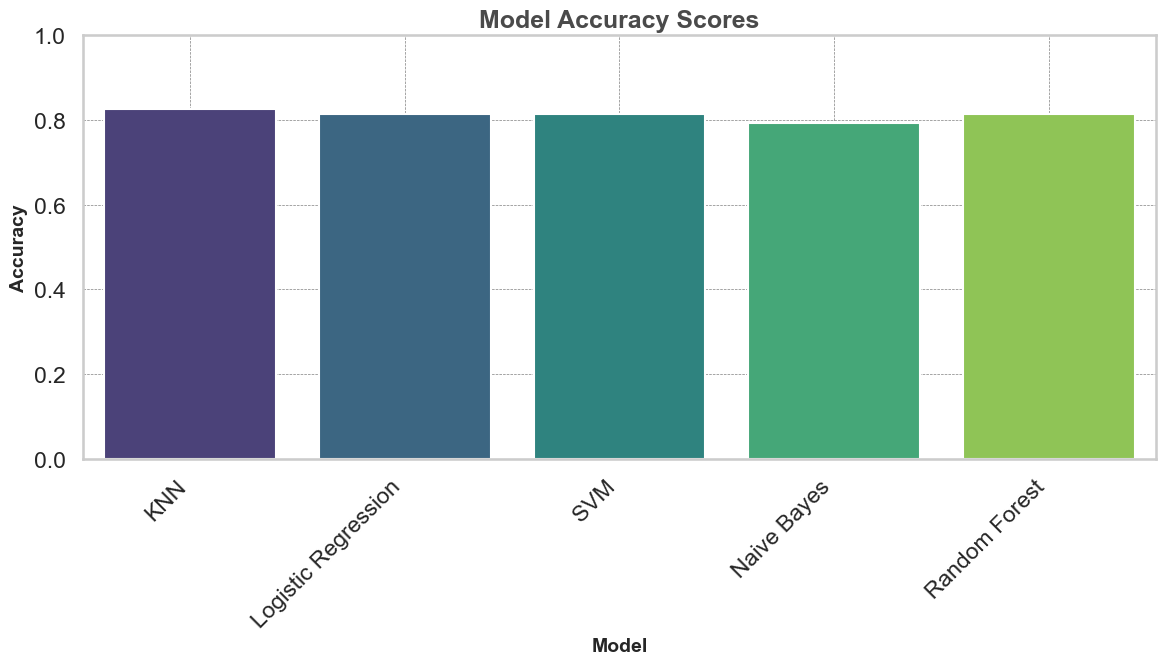

In [353]:

sns.set(style="whitegrid", context="talk")

def plot_accuracy_scores(scores, models):
    plt.figure(figsize=(12, 7))
    sns.barplot(x=models, y=scores, palette="viridis",hue=models)
    plt.title('Model Accuracy Scores', fontsize=18, weight='bold', color='#4A4A4A')
    plt.xlabel('Model', fontsize=14, weight='bold')
    plt.ylabel('Accuracy', fontsize=14, weight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.tight_layout()
    plt.show()

models = [
    ('KNN', knn),
    ('Logistic Regression', lr),
    ('SVM', svc),
    ('Naive Bayes',nb),
    ('Random Forest', rfc)
]

accuracy_scores = []
conf_matrices = []
roc_curves = []

for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else np.zeros_like(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_scores.append(accuracy)
    conf_matrices.append((model_name, cm))
    if hasattr(model, 'predict_proba'):
        roc_curves.append((model_name, y_pred_prob))

plot_accuracy_scores(accuracy_scores, [model[0] for model in models])

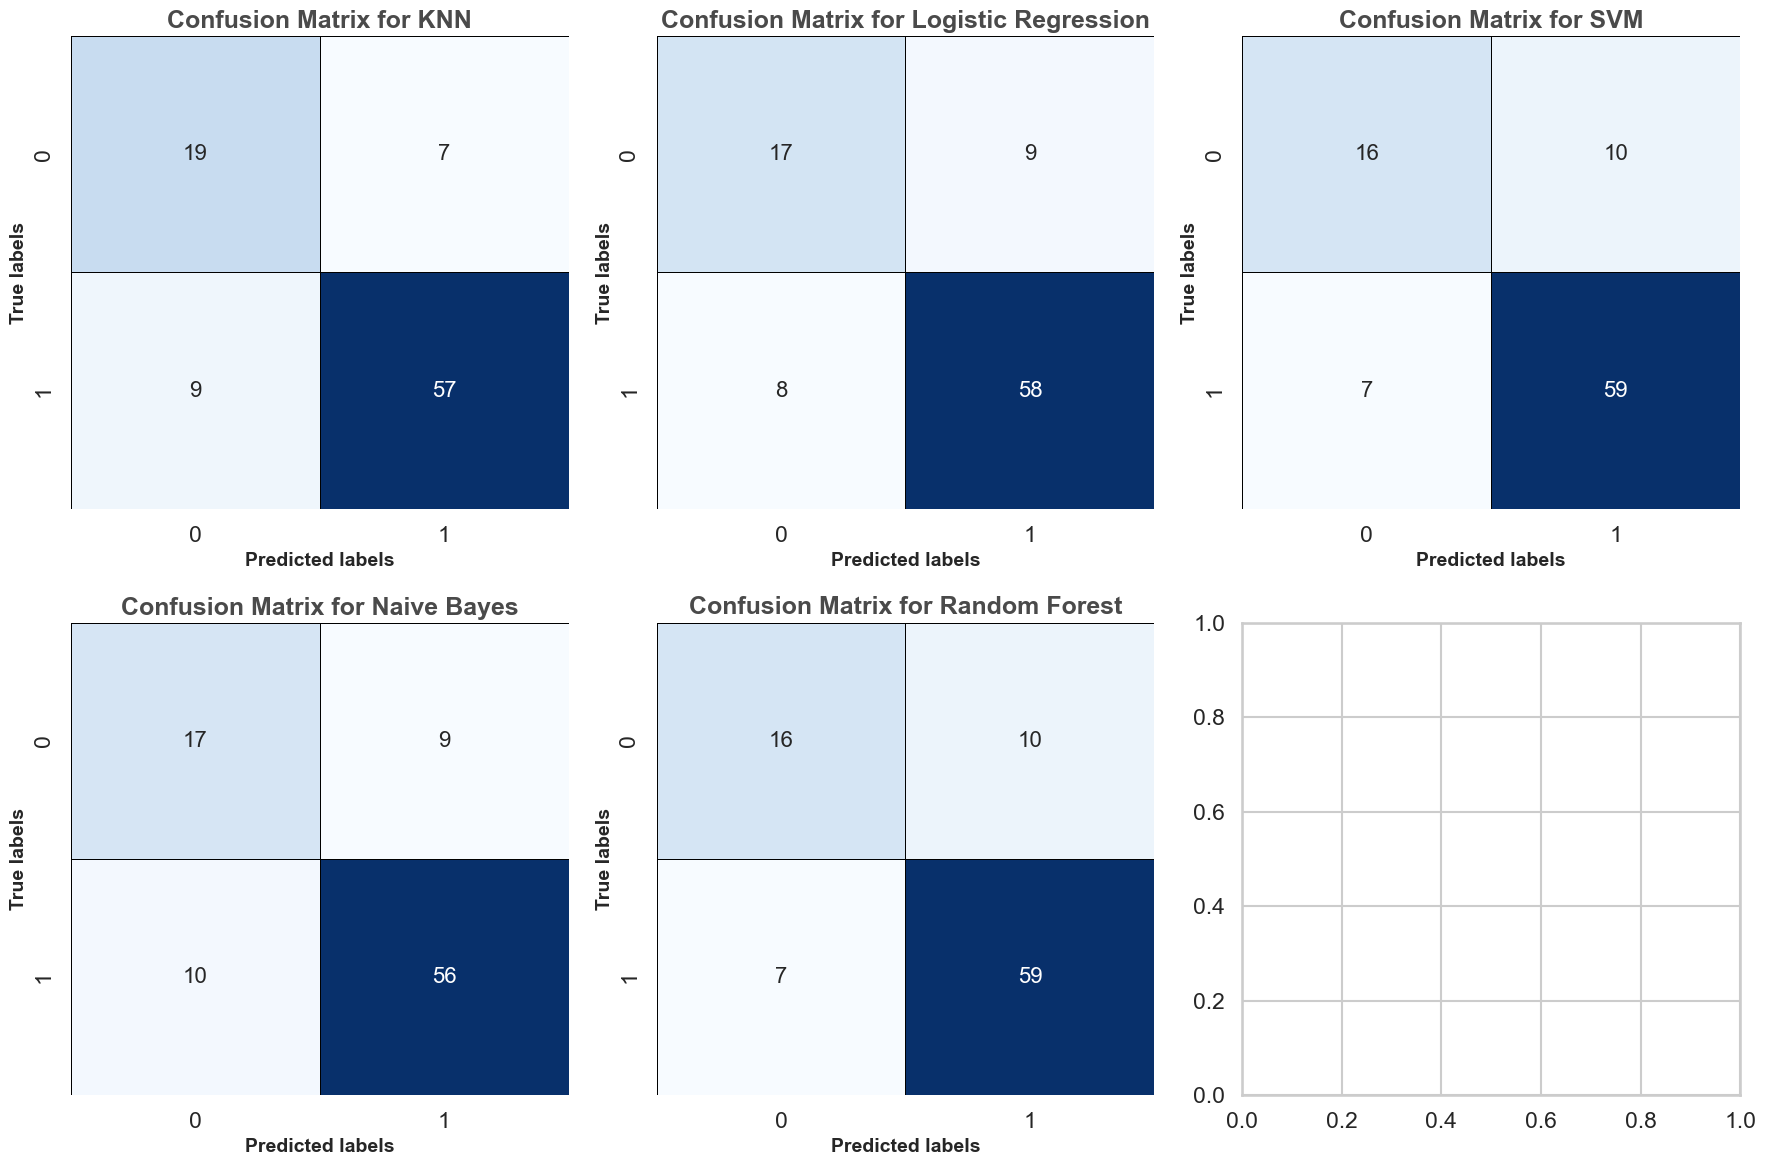

In [354]:
def plot_confusion_matrix(cm, model_name, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                annot_kws={"size": 16}, linewidths=0.5, linecolor='black')
    ax.set_xlabel('Predicted labels', fontsize=14, weight='bold')
    ax.set_ylabel('True labels', fontsize=14, weight='bold')
    ax.set_title(f'Confusion Matrix for {model_name}', fontsize=18, weight='bold', color='#4A4A4A')

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for ax, (model_name, cm) in zip(axes, conf_matrices):
    plot_confusion_matrix(cm, model_name, ax)
plt.tight_layout()
plt.show()

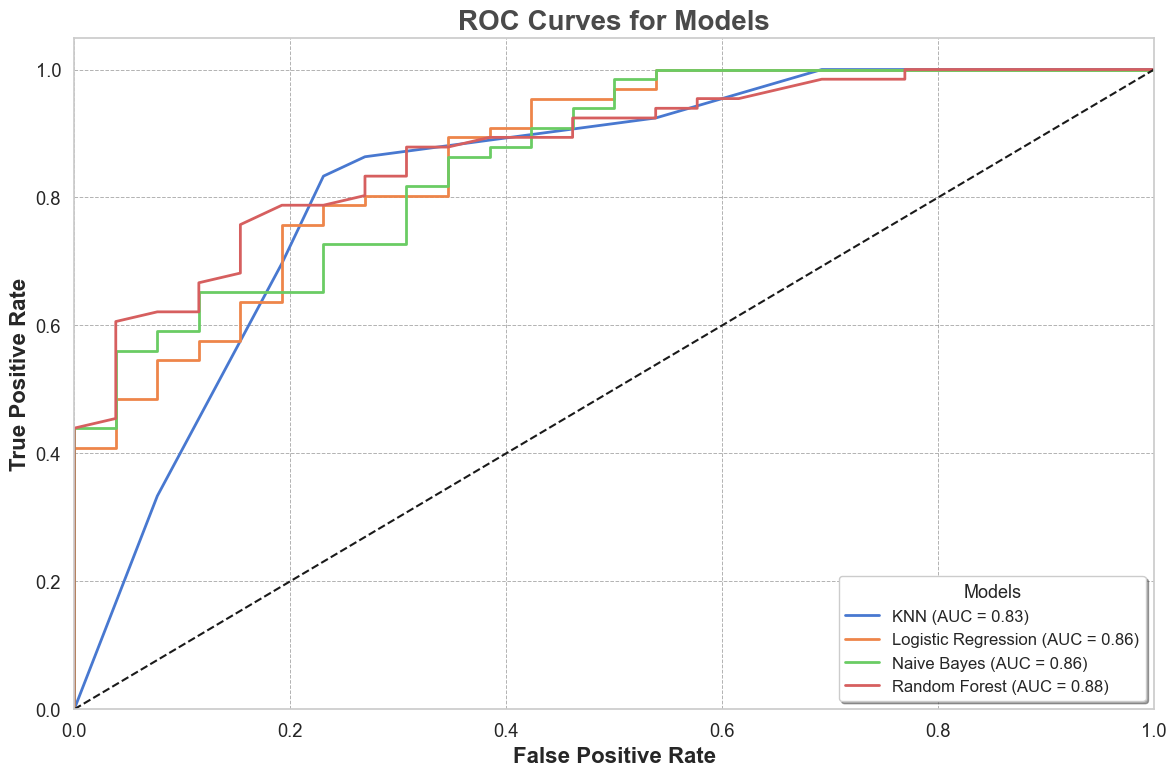

In [355]:
def plot_roc_curves(roc_curves):
    plt.figure(figsize=(12, 8))
    
    # Set aesthetic style
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)
    
    # Plot ROC curves
    for model_name, y_pred_prob in roc_curves:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        auc_score = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', lw=2)
    
    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    
    # Set limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16, weight='bold')
    plt.ylabel('True Positive Rate', fontsize=16, weight='bold')
    plt.title('ROC Curves for Models', fontsize=20, weight='bold', color='#4A4A4A')
    
    # Add legend and grid
    plt.legend(loc="lower right", fontsize=12, title='Models', title_fontsize='13', shadow=True)
    plt.grid(True, linestyle='--', linewidth=0.7, color='gray', alpha=0.6)
    
    # Apply tight layout
    plt.tight_layout()
    plt.show()

# Call the function
plot_roc_curves(roc_curves)


# Gradio Interface 

In [356]:
import joblib

joblib.dump(knn, 'knn_model.pkl')
joblib.dump(lr, 'lr_model.pkl')
joblib.dump(svc, 'svc_model.pkl')
joblib.dump(nb, 'nb_model.pkl')
joblib.dump(rfc, 'rfc_model.pkl')

['rfc_model.pkl']

In [357]:
import gradio as gr

def predict(humidity, temperature, windspeed):
    features = [[humidity, temperature, windspeed]]
    predictions = {
        "KNN": knn.predict(features)[0],
        "Logistic Regression": lr.predict(features)[0],
        "SVM": svc.predict(features)[0],
        "Naive Bayes": nb.predict(features)[0],
        "Random Forest": rfc.predict(features)[0]
    }
    return predictions

# Create Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Slider(minimum=0, maximum=1000, value=50, label="Humidity"),
        gr.Slider(minimum=-10, maximum=70, value=20, label="Temperature"),
        gr.Slider(minimum=0, maximum=500, value=10, label="Windspeed")
    ],
    outputs="json",
    title="Predictive Model Dashboard",
    description="Enter values for humidity, temperature, and windspeed to get predictions from multiple models.",
    examples=[
        [50, 20, 10],
        [75, 30, 20],
        [30, 10, 5]
    ]
)

interface.launch()


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.
